# Filtros eléctricos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import curve_fit
import pandas as pd

#### Clase Medicion

In [2]:
class Medicion(object):
    
    """
    Documentacion de la clase Medicion
    """
    
    def __init__(self):
         
        self.R = np.NaN
        self.L = np.NaN
        self.C = np.NaN
        self.diferencia_fase = np.NaN
        self.Vch1 = np.NaN
        self.unidad_Vch1 = np.NaN
        self.Vch2 = np.NaN
        self.unidad_Vch2 = np.NaN
        self.frecuencia = np.NaN
        self.error_amperimetro = np.NaN
        self.error_voltimetro = np.NaN
        self.error_resistencia = np.NaN
        self.parametrosA = np.NaN
        self.matriz_varA = np.NaN
        self.atenuacion = np.NaN
        self.transferencia = np.NaN
        self.parametrosT = np.NaN
        self.matriz_varT = np.NaN
        self.parametrosDF = np.NaN
        self.matriz_varDF = np.NaN
        
    
    #funcion que me permite cargar los datos, se puede usar despues Medicion.cargar_resistencia(ponervalores)
    def cargar_componentes(self, R, L, C):
        
        self.R = R
        self.L = L
        self.C = C
    
    def cargar_diffase(self, valores):
        
        self.diferencia_fase = valores
        
    def cargar_Vch1(self, valores, unidad):
        
        self.Vch1 = valores
        self.unidad_Vch1 = unidad
        
    def cargar_Vch2(self, valores, unidad):
        
        self.Vch2 = valores
        self.unidad_Vch2 = unidad
        
    def cargar_frecuencia(self, valores):
        
        self.frecuencia = valores
                
    def cargar_error(self, eAmp, eVol, eRes):
        
        self.error_amperimetro = eAmp
        self.error_voltimetro = eVol
        self.error_resistencia = eRes
        
    def cargar_atenuacion(self, valores):
        
        self.atenuacion = valores
        
    def cargar_transferencia(self, valores):
        
        self.transferencia = valores
            
    def cargar_parametrosA(self, param, var):
        
        self.parametrosA = param
        self.matriz_varA = var
    
    def cargar_parametrosT(self, param, var):
        
        self.parametrosT = param
        self.matriz_varT = var  
        
    def cargar_parametrosDF(self, param, var):
        self.parametrosDF = param
        self.matriz_varDF = var
    

#### Función de transferencia: $T = |\frac{V_{o}}{V_{i}}|$, donde $V_{o}$ es el voltaje de salida y $V_{i}$ el de entrada

In [3]:
def transferencia(Vo, Vi):
    trn = np.abs(Vo)/np.abs(Vi)
    return trn

#### Atenuación: $A = 20\;\log_{10}(T)$

In [4]:
def atenuacion(trn):
    A = 20*np.log10(trn)
    return A

## RC pasabajos

R = 1000 $\Omega$

C = 1 $\mu F$

Cargo los datos del osciloscopio:

In [5]:
RCpb = Medicion()
RCpb.cargar_Vch1(np.array([4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8]), 'V')
RCpb.cargar_Vch2(np.array([5.08,4.88,4.32,3.12,2.36,1.84,1.6,1.28,1.12,0.96,0.912,0.864,0.816,0.784,0.736,0.704,0.688,0.608,0.560,0.320,0.232,0.180,0.152,0.128,0.096,0.080,0.060]), 'V')
RCpb.cargar_diffase(np.array([7,18.5,30.9,50.8,60.9,67.6,71,72.5,75.6,77.9,78.9,79.5,81.9,80.1,80.7,81.4,81.9,82.2,82.6,87.5,85.5,87.9,88,87,88.5,90,84.7]))
RCpb.cargar_frecuencia(np.array([20,50,100,200,300,400,500,600,700,800,850,900,950,1000,1050,1100,1150,1300,1400,2500,3500,4500,5500,6500,8500,10500,14500]))

In [6]:
RCpb.cargar_transferencia(transferencia(RCpb.Vch2, RCpb.Vch1))
RCpb.cargar_atenuacion(atenuacion(RCpb.transferencia))

Para el ajuste, en este caso $T = \frac{1}{\sqrt{1 + (\frac{\omega}{\omega_{0}})^2}}$, $A = -10 \; \log_{10}(1+(\frac{\omega}{\omega_{0}})^2)$ y $\phi = - \arctan(\frac{\omega}{\omega_{0}})$

In [7]:
def trnRCpb(frec, omega_0):
    trn = 1/np.sqrt(1+(((frec*2*np.pi)/omega_0)**2))
    return trn 

In [8]:
def ARCpb(frec, omega_0):
    A = -10*np.log10(1+(((frec*2*np.pi)/omega_0)**2))
    return A

In [9]:
def phiRCpb(frec, omega_0):
    phi = np.arctan((frec*2*np.pi)/omega_0)*180/np.pi
    return phi

In [10]:
params, var = curve_fit(trnRCpb, RCpb.frecuencia, RCpb.transferencia, p0=[1000])
RCpb.cargar_parametrosT(params, var)
params, var = curve_fit(ARCpb, RCpb.frecuencia, RCpb.atenuacion, p0=[1000])
RCpb.cargar_parametrosA(params, var)
params, var = curve_fit(phiRCpb, RCpb.frecuencia, RCpb.diferencia_fase, p0=[1000])
RCpb.cargar_parametrosDF(params, var)

In [11]:
print('Según los ajustes, la frecuencia de corte y el error asociado a cada una es:')
print(RCpb.parametrosT, np.sqrt(RCpb.matriz_varT))
print(RCpb.parametrosA, np.sqrt(RCpb.matriz_varA))
print(RCpb.parametrosDF, np.sqrt(RCpb.matriz_varDF))
print('Entonces un valor promedio será:')
print((RCpb.parametrosT + RCpb.parametrosA + RCpb.parametrosDF)/3, np.sqrt((RCpb.matriz_varT+RCpb.matriz_varA+RCpb.matriz_varDF)/9))

Según los ajustes, la frecuencia de corte y el error asociado a cada una es:
[1072.69235987] [[21.42688618]]
[1058.27960042] [[7.28043917]]
[1049.07770352] [[20.60668375]]
Entonces un valor promedio será:
[1060.0165546] [[10.20213301]]


Grafico:

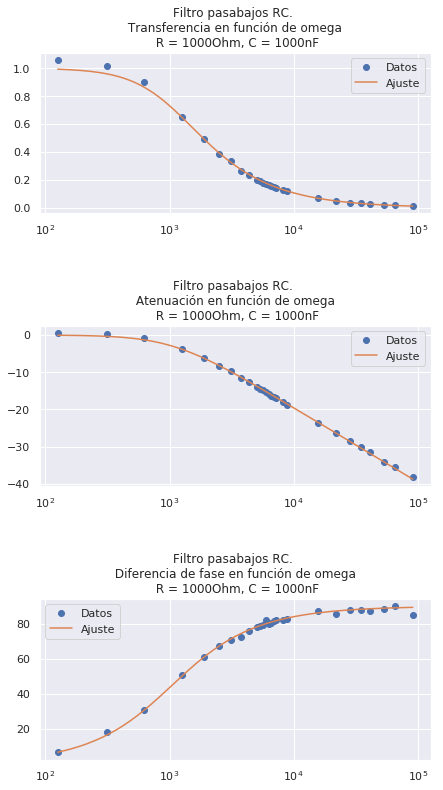

In [12]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasabajos RC. \n Transferencia en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(RCpb.frecuencia*2*np.pi, RCpb.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(20,14500, 5000), trnRCpb(np.linspace(20,14500, 5000), *RCpb.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasabajos RC. \n Atenuación en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RCpb.frecuencia, RCpb.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(20,14500, 5000), ARCpb(np.linspace(20,14500, 5000), *RCpb.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasabajos RC. \n Diferencia de fase en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RCpb.frecuencia, RCpb.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(20,14500, 5000), phiRCpb(np.linspace(20,14500, 5000), *RCpb.parametrosDF), label = 'Ajuste')
plt.legend()

## RC pasaaltos

R = 1000 $\Omega$

C = 1 $\mu F$

In [13]:
RCpa = Medicion()
RCpa.cargar_Vch1(np.array([5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04, 4.96,4.96,4.92,4.84,4.84,4.8,4.84,4.8,4.8,4.8,4.8]), 'V')
RCpa.cargar_Vch2(np.array([0.316,0.620,0.912,1.22,1.5,1.78,2.02,2.22,2.44,3.36,2.96,3.84,4.12,4.32,4.52,4.64,4.72,4.8,4.8,4.8,4.8,4.8]), 'V')
RCpa.cargar_diffase(np.array([84.4,85.5,79,80.6,77.4,72,65.3,67,61,47.3,53,38.2,33.7,29.1,23,18,15.6,14.1,11.5,11.6,8.6,7.57]))
RCpa.cargar_frecuencia(np.array([10,20,30,40,50,60,70,80,90,150,120,200,250,300,400,500,600,700,800,900,1000,1500]))

In [14]:
RCpa.cargar_transferencia(transferencia(RCpa.Vch2, RCpa.Vch1))
RCpa.cargar_atenuacion(atenuacion(RCpa.transferencia))

Para el ajuste, en este caso  $T = \frac{1}{\sqrt{1 + (\frac{\omega}{\omega_{0}})^{-2}}}$, $A = -10 \; \log_{10}(1+(\frac{\omega}{\omega_{0}})^{-2})$ y $\phi = - \arctan((\frac{\omega}{\omega_{0}})^{-1})$

In [15]:
def trnRCpa(frec, omega_0):
    trn = 1/np.sqrt(1+((frec*2*np.pi)/omega_0)**(-2))
    return trn 

In [16]:
def ARCpa(frec, omega_0):
    A = -10*np.log10(1+((2*np.pi*frec)/omega_0)**(-2))
    return A

In [17]:
def phiRCpa(frec, omega_0):
    phi = np.arctan(((2*np.pi*frec)/omega_0)**(-1))*180/np.pi
    return phi

In [18]:
params, var = curve_fit(trnRCpa, RCpa.frecuencia, RCpa.transferencia, p0=[1000])
RCpa.cargar_parametrosT(params, var)
params, var = curve_fit(ARCpa, RCpa.frecuencia, RCpa.atenuacion, p0=[1000])
RCpa.cargar_parametrosA(params, var)
params, var = curve_fit(phiRCpa, RCpa.frecuencia, RCpa.diferencia_fase, p0=[1000])
RCpa.cargar_parametrosDF(params, var)

In [19]:
print('Según los ajustes, la frecuencia de corte y el error asociado a cada una es:')
print(RCpa.parametrosT, np.sqrt(RCpa.matriz_varT))
print(RCpa.parametrosA, np.sqrt(RCpa.matriz_varA))
print(RCpa.parametrosDF, np.sqrt(RCpa.matriz_varDF))
print('Entonces un valor promedio será:')
print((RCpa.parametrosT + RCpa.parametrosA + RCpa.parametrosDF)/3, 
      np.sqrt((RCpa.matriz_varT+RCpa.matriz_varA+RCpa.matriz_varDF)/9))

Según los ajustes, la frecuencia de corte y el error asociado a cada una es:
[1020.37860955] [[9.15630887]]
[1014.04388247] [[4.28704087]]
[1057.78838157] [[21.82363827]]
Entonces un valor promedio será:
[1030.73695786] [[8.01725846]]


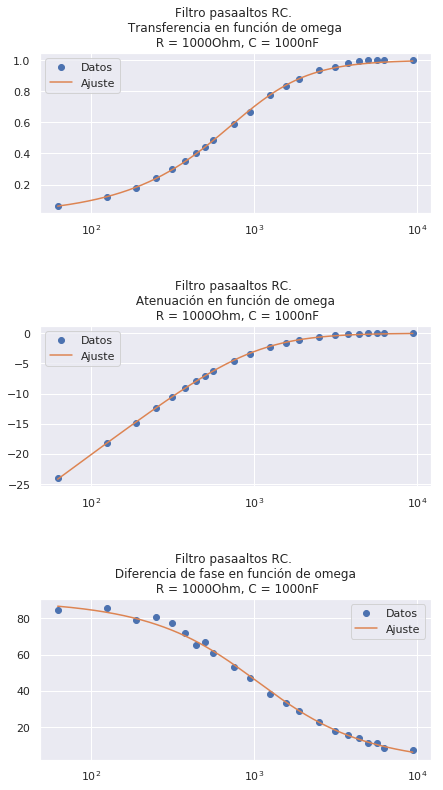

In [20]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasaaltos RC. \n Transferencia en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(RCpa.frecuencia*2*np.pi, RCpa.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,1500, 5000), trnRCpa(np.linspace(10,1500, 5000), *RCpa.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasaaltos RC. \n Atenuación en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RCpa.frecuencia, RCpa.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(10,1500, 5000), ARCpa(np.linspace(10,1500, 5000), *RCpa.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasaaltos RC. \n Diferencia de fase en función de omega \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RCpa.frecuencia, RCpa.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,1500, 5000), phiRCpa(np.linspace(10,1500, 5000), *RCpa.parametrosDF), label = 'Ajuste')
plt.legend()

## RL pasabajos

R = 1000 $\Omega$

L = 1 H

$r_{l}$ = 300 $\Omega$

In [21]:
RLpb = Medicion()
RLpb.cargar_Vch1(np.array([4.88,4.88,4.96,4.96,4.96,4.96,4.96,4.96,5.04,5.04,5.04,5.04,5.12,5.04,5.12,5.12,5.04,5.04,5.12,5.12]), 'V')
RLpb.cargar_Vch2(np.array([3.8,3.72,3.72,3.48,3.12,2.8,2.52,2.02,1.76,1.52,1.34,1.16,1.01,0.936,0.840,0.776,0.640,0.592,0.444,0.284]), 'V')
RLpb.cargar_diffase(np.array([3.96,7.57,15.5,25,36.1,44,50.2,60,63.5,65.3,70.3,72.5,76.7,77.8,77.5,77.3,76.5,81.5,78.3,83.4]))
RLpb.cargar_frecuencia(np.array([10.00,29.94,50.00,100.00,150.00,200.00,250.00,350.10,419.4,500.00,600.9,700.2,801.2,900.9,1000.00,1096.00,1302.00,1504.00,2000,3003.00]))

In [22]:
RLpb.cargar_transferencia(transferencia(RLpb.Vch2, RLpb.Vch1))
RLpb.cargar_atenuacion(atenuacion(RLpb.transferencia))

Para el ajuste, en este caso también tenemos la resistencia interna de la bobina, entonces  $T = \frac{1}{\sqrt{(1+ \frac{r_{l}}{R})^2 + (\frac{\omega}{\omega_{0}})^{-2}}}$, $A = -10 \; \log_{10}((1+\frac{r_{l}}{R})^2 +(\frac{\omega}{\omega_{0}})^{-2})$ y $\phi = - \arctan(\frac{\omega}{\omega_{0}}^{-1})$, con $\omega_{0} = \frac{R}{L}$

In [23]:
def trnRLpb(frec, omega_0):
    trn = 1/np.sqrt((1+(300/1000))**2+(((frec*2*np.pi)/omega_0)**(2)))
    return trn 

In [24]:
def ARLpb(frec, omega_0):
    A = -10*np.log10((1+(300/1000))**2+(((frec*2*np.pi)/omega_0)**2))
    return A

In [25]:
def phiRLpb(frec, omega_0):
    phi = np.arctan((frec*2*np.pi)/omega_0)*180/np.pi
    return phi

Ajuste:

In [26]:
params, var = curve_fit(trnRLpb, RLpb.frecuencia, RLpb.transferencia, p0=[1300])
RLpb.cargar_parametrosT(params, var)
params, var = curve_fit(ARLpb, RLpb.frecuencia, RLpb.atenuacion, p0=[1000])
RLpb.cargar_parametrosA(params, var)
params, var = curve_fit(phiRLpb, RLpb.frecuencia, RLpb.diferencia_fase, p0=[1000])
RLpb.cargar_parametrosDF(params, var)

In [27]:
print('Según los ajustes, la frecuencia de corte y el error asociado a cada una es:')
print(RLpb.parametrosT, np.sqrt(RLpb.matriz_varT))
print(RLpb.parametrosA, np.sqrt(RLpb.matriz_varA))
print(RLpb.parametrosDF, np.sqrt(RLpb.matriz_varDF))
print('Entonces un valor promedio será:')
print((RLpb.parametrosT + RLpb.parametrosA + RLpb.parametrosDF)/3, 
      np.sqrt((RLpb.matriz_varT+RLpb.matriz_varA+RLpb.matriz_varDF)/9))

Según los ajustes, la frecuencia de corte y el error asociado a cada una es:
[1052.04467881] [[5.33552242]]
[1062.71971517] [[6.04626285]]
[1334.68096877] [[34.44570137]]
Entonces un valor promedio será:
[1149.81512092] [[11.79233007]]


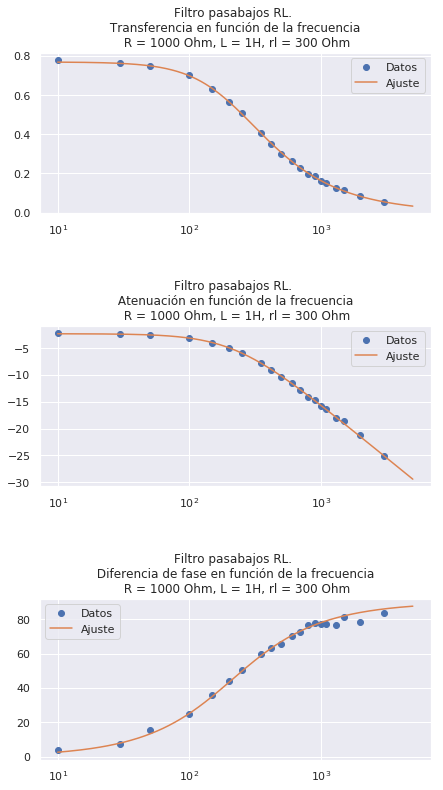

In [28]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasabajos RL. \n Transferencia en función de la frecuencia \n R = 1000 Ohm, L = 1H, rl = 300 Ohm')
plt.xscale('log')
plt.plot(RLpb.frecuencia, RLpb.transferencia, 'o', label = 'Datos')
plt.plot(np.linspace(10,5000, 5000), trnRLpb(np.linspace(10,5000, 5000), *RLpb.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasabajos RL. \n Atenuación en función de la frecuencia \n R = 1000 Ohm, L = 1H, rl = 300 Ohm')
plt.xscale('log')
plt.plot(RLpb.frecuencia, RLpb.atenuacion, 'o', label = "Datos")
plt.plot(np.linspace(10,5000, 5000), ARLpb(np.linspace(10,5000, 5000), *RLpb.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasabajos RL. \n Diferencia de fase en función de la frecuencia \n R = 1000 Ohm, L = 1H, rl = 300 Ohm')
plt.xscale('log')
plt.plot(RLpb.frecuencia, RLpb.diferencia_fase, 'o', label = 'Datos')
plt.plot(np.linspace(10,5000, 5000), phiRLpb(np.linspace(10,5000, 5000), *RLpb.parametrosDF), label = 'Ajuste')
plt.legend()

## RL pasaaltos

R = 1000 $\Omega$

L = 1 H

$r_{l}$ = 300 $\Omega$

In [29]:
RLpa = Medicion()
RLpa.cargar_Vch1(np.array([4.88,4.88,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.96,5,5,5,5,5,5,5,5.08,5,5.08,5.08,5.08,5.08,5.08,5.08]), 'V')
RLpa.cargar_Vch2(np.array([1.24,1.30,1.50,1.80,2.04,2.26,2.40,2.84,3.28,3.48,3.72,3.92,4.12,4.40,4.52,4.56,4.68,4.84,4.88,4.92,4.96,5.00,5.00,5.04,5.08]), 'V')
RLpa.cargar_diffase(-1*np.array([8.64,20,32,34.5,37.8,36,38,35,34,31.5,32,28.8,26,23,23,18,15,16,12,12,8,6,9,7,2]))
RLpa.cargar_frecuencia(np.array([10,20,40,60,75,90,100,130,160,190,220,250,280,350,400,420,500,600,700,800,900,1000,1100,1500,2000]))

In [30]:
RLpa.cargar_transferencia(transferencia(RLpa.Vch2, RLpa.Vch1))
RLpa.cargar_atenuacion(atenuacion(RLpa.transferencia))

En este caso, al considerar la resistencia interna de la bobina, $T = \sqrt{\frac{r_{l}^2 + (\omega L)^2}{(R+r_{l})^2 + (\omega L)^2}}$, de donde no tengo $\omega_{0}$ para ajustar (en un caso ideal, $\omega_{0} = \frac{R}{L}$). Entonces obtengo la frecuencia de corte igualando la transferencia a $\frac{1}{\sqrt{2}}$. La atenuación es $A = 20\; \log_{10}(T)$ y $\phi = \arctan \left( \frac{R \omega L}{(\omega L)^2 + r_{l}(R+r_{l})} \right)$

In [31]:
rl = 300
R = 1000
L = 1
def trnRLpa(omega):
    trn = np.sqrt(((rl**2) + ((omega*L)**2))/((R+rl)**2 + ((omega*L)**2)))
    return trn 

Funcion para encontrar el valor más cercano:

In [32]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [33]:
RLpa_teotrn = trnRLpa(2*np.pi*np.linspace(10,2000, 5000))

punto = find_nearest(RLpa_teotrn, 1/np.sqrt(2))

print('El valor más cercano de T es:', RLpa_teotrn[punto], 'y se corresponde a omega=', 2*np.pi*np.linspace(10,2000, 5000)[punto])

El valor más cercano de T es: 0.7069911364512169 y se corresponde a omega= 1228.3947782088069


In [34]:
def ARLpa(trn):
    A = 20*np.log10(trn)
    return A

In [35]:
def phiRLpa(omega):
    phi = -1*np.arctan((R*omega*L)/((omega*L)**2 + rl*(R+rl)))*180/np.pi
    return phi

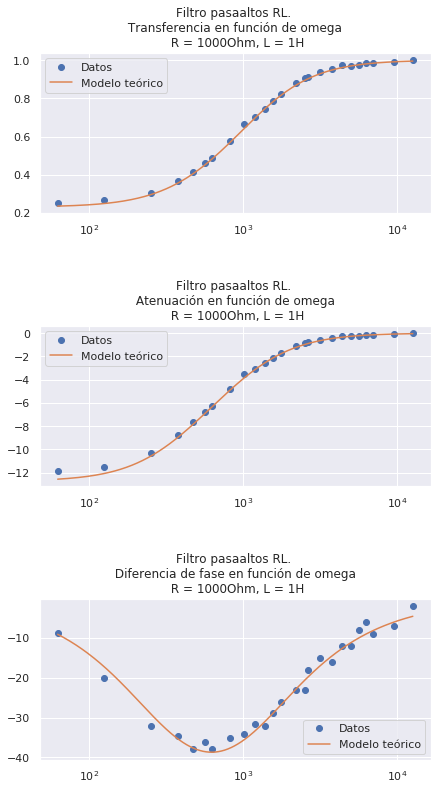

In [36]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasaaltos RL. \n Transferencia en función de omega \n R = 1000Ohm, L = 1H')
plt.xscale('log')
plt.plot(2*np.pi*RLpa.frecuencia, RLpa.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,2000, 5000), RLpa_teotrn, label = 'Modelo teórico')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasaaltos RL. \n Atenuación en función de omega \n R = 1000Ohm, L = 1H')
plt.xscale('log')
plt.plot(2*np.pi*RLpa.frecuencia, RLpa.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(10,2000, 5000), ARLpa(RLpa_teotrn), label = 'Modelo teórico')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasaaltos RL. \n Diferencia de fase en función de omega \n R = 1000Ohm, L = 1H')
plt.xscale('log')
plt.plot(2*np.pi*RLpa.frecuencia, RLpa.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,2000, 5000), phiRLpa(2*np.pi*np.linspace(10,2000, 5000)), label = 'Modelo teórico')
plt.legend()

## LC pasabajos

In [37]:
LCpb = Medicion()
LCpb.cargar_Vch1(np.array([5.04,4.96,4.88,4.88,4.88,4.88,4.92,4.92,4.88,4.96,4.96,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.12,5.12,5.12,5.12,5.04,5.12]), 'V')
LCpb.cargar_Vch2(np.array([5.12,4.96,4.08,2.96,3.68,3.36,3.20,2.72,2.4,2.08,1.8,1.48,1.12,0.860,0.672,0.552,0.456,0.344,0.256,0.216,0.168,0.152,0.09,0.072]), 'V')
LCpb.cargar_diffase(np.array([10.1,51.3,81.9,110,96.1,97.4,104,115,117,122,131,138,139,149,150,152,161,161,165,164,176,174,177,178]))
LCpb.cargar_frecuencia(np.array([20,100,150,200,170,180,190,210,230,250,270,300,350,400,450,500,550,650,750,850,950,1000,1400,1800]))

In [38]:
LCpb.cargar_transferencia(transferencia(LCpb.Vch2, LCpb.Vch1))
LCpb.cargar_atenuacion(atenuacion(LCpb.transferencia))

In [39]:
LCpb.diferencia_fase = np.concatenate((-LCpb.diferencia_fase[0:3] ,  -LCpb.diferencia_fase[3:len(LCpb.diferencia_fase)] + abs(LCpb.diferencia_fase[4]*2)),axis=0)

Para el ajuste, en este caso  $T = \frac{1}{\sqrt{(1-(\frac{\omega}{\omega_{0}})^2)^2 + (\frac{\omega}{\omega_{0}}P)^{2}}}$, $A = -10 \; \log_{10}\left((1-(\frac{\omega}{\omega_{0}})^2)^2 + (\frac{\omega}{\omega_{0}}P)^{2}\right)$ y $\phi = - \arctan\left(\frac{-P \frac{\omega}{\omega_0}}{1 - (\frac{\omega}{\omega_{0}})^2}\right)$ con $\omega_{0} = \frac{1}{\sqrt{LC}}$ y $P = r_{l} \sqrt{\frac{C}{L}}$

In [40]:
def trnLCpb(omega, omega_0, P):
    trn = 1/np.sqrt((1-(omega/omega_0)**2)**2 + (omega*P/omega_0)**2)
    return trn 

In [41]:
def ALCpb(omega, omega_0, P):
    A = -10*np.log10((1-(omega/omega_0)**2)**2 + (P*omega/omega_0)**2)
    return A

In [42]:
def phiLCpb(omega, omega_0, P):
    phi = np.arctan(-1*(P*(omega/omega_0))/(1-(omega/omega_0)**2))*180/np.pi
    return phi

In [43]:
params, var = curve_fit(trnLCpb, 2*np.pi*LCpb.frecuencia, LCpb.transferencia, p0=[1000, 0.3])
LCpb.cargar_parametrosT(params, var)
params, var = curve_fit(ALCpb, 2*np.pi*LCpb.frecuencia, LCpb.atenuacion, p0=[1000, 0.3])
LCpb.cargar_parametrosA(params, var)
params, var = curve_fit(phiLCpb, 2*np.pi*LCpb.frecuencia, LCpb.diferencia_fase, p0=[1000, 1])
LCpb.cargar_parametrosDF(params, var)

In [44]:
print(LCpb.parametrosT, LCpb.parametrosA, LCpb.parametrosDF)

[1023.97148829    1.28311012] [1092.09939159    1.43703551] [1068.14148879    1.29338149]


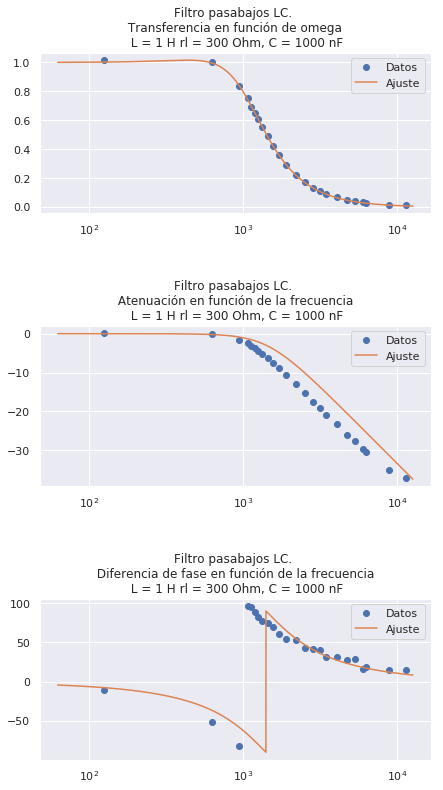

In [45]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasabajos LC. \n Transferencia en función de omega \n L = 1 H rl = 300 Ohm, C = 1000 nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpb.frecuencia, LCpb.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,2000, 5000), trnLCpb(2*np.pi*np.linspace(10,2000, 5000), *LCpb.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasabajos LC. \n Atenuación en función de la frecuencia \n L = 1 H rl = 300 Ohm, C = 1000 nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpb.frecuencia, LCpb.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(10,2000, 5000), ALCpb(2*np.pi*np.linspace(10,1500, 5000), *LCpb.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasabajos LC. \n Diferencia de fase en función de la frecuencia \n L = 1 H rl = 300 Ohm, C = 1000 nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpb.frecuencia, LCpb.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,2000, 5000), phiLCpb(2*np.pi*np.linspace(10,1500, 5000), *LCpb.parametrosDF), label = 'Ajuste')
plt.legend()

## LC pasaaltos

In [46]:
LCpa = Medicion()
LCpa.cargar_Vch1(np.array([5.12,5.12,5.12,5.12,5.04,5.04,5.04,5.04,4.96,4.96,4.96,4.96,4.96,4.96,4.96,4.88,4.96,5.00,5.04,5.04,5.04,5.04,5.04,5.04,5.12,5.12,5.04]), 'V')
LCpa.cargar_Vch2(np.array([0.44,0.824,1.26,1.68,2.10,2.56,3.02,3.46,3.92,4.34,4.74,5.16,5.52,5.76,5.96,6.16,6.40,5.92,5.68,5.52,5.36,5.28,5.28,5.28,5.28,5.28,5.20]), 'V')
LCpa.cargar_diffase(-1*np.array([90,87,83,81,78.6,77.6,73.6,70.8,66.5,64.7,58.0,56.2,49.9,46.4,42.1,39.0,15.2,6.30,5.50,3.17,2.10,3.24,1.22,1.36,1.44,0,0]))
LCpa.cargar_frecuencia(np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,250,350,450,550,650,750,850,950,1000,1050,1150]))

In [47]:
LCpa.cargar_transferencia(transferencia(LCpa.Vch2, LCpa.Vch1))
LCpa.cargar_atenuacion(atenuacion(LCpa.transferencia))

Para el ajuste, en este caso  $T = \sqrt{\frac{(\frac{\omega}{\omega_{0}})^4 + (P \frac{\omega}{\omega_0})^2}{(1-(\frac{\omega}{\omega_{0}})^2)^2 + (P \frac{\omega}{\omega_{0}})^2}}$, $A = 10 \; \log_{10}\left(\frac{(\frac{\omega}{\omega_{0}})^4 + (P \frac{\omega}{\omega_0})^2}{(1-(\frac{\omega}{\omega_{0}})^2)^2 + (P \frac{\omega}{\omega_{0}})^2} \right)$ y $\phi = - \arctan\left(\frac{-P \frac{\omega}{\omega_0}}{1 - (\frac{\omega}{\omega_{0}})^2}\right)$ con $\omega_{0} = \frac{1}{\sqrt{LC}}$ y $P = r_{l} \sqrt{\frac{C}{L}}$

In [49]:
def trnLCpa(omega, omega_0, P):
    trn = np.sqrt(((omega/omega_0)**4+(omega*P/omega_0)**2)/((1-(omega/omega_0)**2)**2+(P*omega/omega_0)**2))
    return trn 

In [50]:
def ALCpa(omega, omega_0, P):
    A = 10*np.log10(((omega/omega_0)**4+(omega*P/omega_0)**2)/((1-(omega/omega_0)**2)**2+(P*omega/omega_0)**2))
    return A

In [51]:
def phiLCpa(omega, omega_0,P):
    phi = np.arctan((P+omega/omega_0)/(((omega/omega_0)**2)*((omega/omega_0)**2 - P**2 -1)))*180/np.pi
    return phi

In [52]:
params, var = curve_fit(trnLCpa, 2*np.pi*LCpa.frecuencia, LCpa.transferencia, p0=[1000, 0.3])
LCpa.cargar_parametrosT(params, var)
params, var = curve_fit(ALCpa, 2*np.pi*LCpa.frecuencia, 2*np.pi*LCpa.atenuacion, p0=[1000, 0.3])
LCpa.cargar_parametrosA(params, var)
params, var = curve_fit(phiLCpa, 2*np.pi*LCpa.frecuencia, LCpa.diferencia_fase, p0=[1000, 0.3], bounds = ([1000,0],[1100, 0.4]))
LCpa.cargar_parametrosDF(params, var)

In [53]:
print(LCpa.parametrosT, LCpa.parametrosA, LCpa.parametrosDF)

[1023.40968557    1.30405723] [ 1.51696479e+03 -2.37449231e-06] [1.00156727e+03 4.00000000e-01]


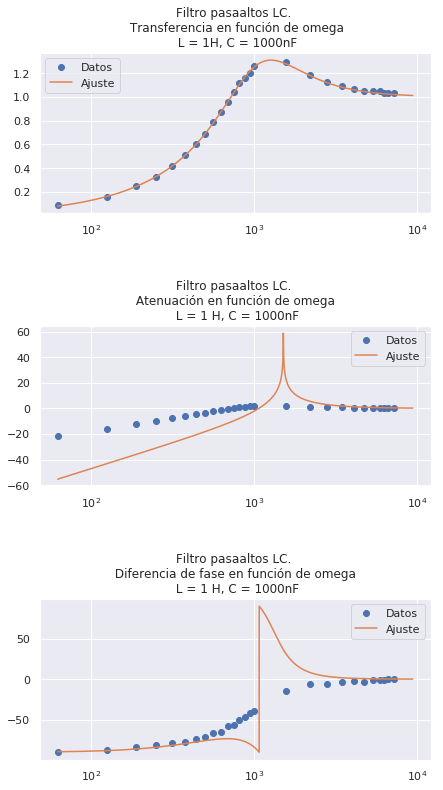

In [54]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasaaltos LC. \n Transferencia en función de omega\n L = 1H, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpa.frecuencia, LCpa.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,1500, 5000), trnLCpa(2*np.pi*np.linspace(10,1500, 5000), *LCpa.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasaaltos LC. \n Atenuación en función de omega \n L = 1 H, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpa.frecuencia, LCpa.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(10,1500, 5000), ALCpa(2*np.pi*np.linspace(10,1500, 5000), *LCpa.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasaaltos LC. \n Diferencia de fase en función de omega \n L = 1 H, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*LCpa.frecuencia, LCpa.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,1500, 5000), phiLCpa(2*np.pi*np.linspace(10,1500, 5000), *LCpa.parametrosDF), label = 'Ajuste')
plt.legend()

## RLC pasabanda (en serie)

In [55]:
RLCpb = Medicion()
RLCpb.cargar_Vch1(np.array([5.12,5.12,5.04,5.04,5.04,4.96,4.96,4.96,4.88,4.88,4.96,4.96,4.96,4.96,4.96,5.04,5.04,4.88,4.96,4.88,5.04,5.04,5.12,5.12,5.12,5.12,5.12,5.12,5.12]), 'V')
RLCpb.cargar_Vch2(np.array([0.672,0.984,1.29,1.61,1.96,3.04,2.52,3.42,3.76,3.72,3.60,3.16,2.76,2.40,2.12,1.92,1.68,3.76,3.84,3.64,1.42,1.28,1.10,0.980,0.856,0.752,0.640,0.488,0.352]), 'V')
RLCpb.cargar_diffase(np.array([-79,-76.8,-72.5,-67,-62.8,-36.9,-48.3,-24.2,-5.4,9.06,16.7,34.9,46.5,49.9,61.8,63.5,64.4,-1.9,6.12,13.6,70.7,71.6,73.8,76.7,71.3,80.2,78.3,83.5,84.2]))
RLCpb.cargar_frecuencia(np.array([20,30,40,50,60,100,80,120,150,180,200,250,300,350,400,450,500,160,170,190,600,700,800,900,1000,1200,1400,2000,3000]))

In [56]:
RLCpb.cargar_transferencia(transferencia(RLCpb.Vch2, RLCpb.Vch1))
RLCpb.cargar_atenuacion(atenuacion(RLCpb.transferencia))

Para el ajuste, en este caso  $T = \frac{R}{\sqrt{(R+r_{l})^2 + (\omega L - \frac{1}{\omega C})^2}}$ que se puede reescribir como $T = \frac{1}{\sqrt{P^2 + Q^2(\omega - \frac{X}{\omega})}}$, donde $P = \frac{R + r_{l}}{R}$, $Q = \frac{L}{R}$ y $X = \frac{1}{LC}$. $A = 20 \; \log_{10}\left(\frac{1}{\sqrt{P^2 + Q^2(\omega - \frac{X}{\omega})}}\right)$ y $\phi =  \arctan\left(\frac{Q\omega - \frac{X}{\omega}}{P}\right)$

In [83]:
def trnRLCpb(omega, X, P, Q):
    trn = 1 / np.sqrt(P**2 + (Q**2)*(omega-X/omega)**2)
    return trn 

In [84]:
def ARLCpb(omega, X, P, Q):
    A = 20*np.log10(1 / np.sqrt(P**2 + (Q**2)*(omega-X/omega)**2))
    return A

In [88]:
def phiRLCpb(omega, X, P, Q):
    phi = np.arctan(((Q*omega)-(X/omega))/P)*180/np.pi
    return phi

In [89]:
params, var = curve_fit(trnRLCpb, 2*np.pi*RLCpb.frecuencia, RLCpb.transferencia, p0=[1e6,1.3,0.001])
RLCpb.cargar_parametrosT(params, var)
params, var = curve_fit(ARLCpb, 2*np.pi*RLCpb.frecuencia, RLCpb.atenuacion, p0=[1e6,1.3,0.001])
RLCpb.cargar_parametrosA(params, var)
params, var = curve_fit(phiRLCpb, 2*np.pi*RLCpb.frecuencia, RLCpb.diferencia_fase, p0=[1e6,1.3,0.001])
RLCpb.cargar_parametrosDF(params, var)

In [91]:
print(RLCpb.parametrosT, RLCpb.parametrosA, RLCpb.parametrosDF)

[1.04878283e+06 1.30268082e+00 9.33476485e-04] [1.07001066e+06 1.31607733e+00 9.03231381e-04] [1.05645972e+06 1.35715757e+03 1.02549778e+00]


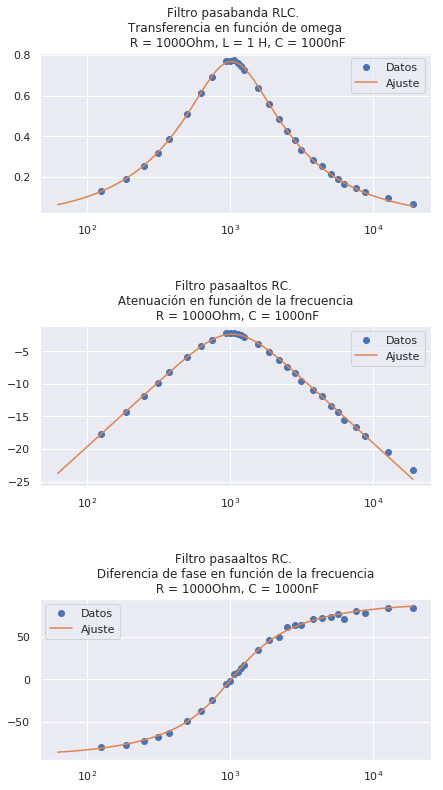

In [97]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasabanda RLC. \n Transferencia en función de omega \n R = 1000Ohm, L = 1 H, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RLCpb.frecuencia, RLCpb.transferencia, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,3000, 5000), trnRLCpb(2*np.pi*np.linspace(10,3000, 5000), *RLCpb.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasaaltos RC. \n Atenuación en función de la frecuencia \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RLCpb.frecuencia, RLCpb.atenuacion, 'o', label = "Datos")
plt.plot(2*np.pi*np.linspace(10,3000, 5000), ARLCpb(2*np.pi*np.linspace(10,3000, 5000), *RLCpb.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasaaltos RC. \n Diferencia de fase en función de la frecuencia \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(2*np.pi*RLCpb.frecuencia, RLCpb.diferencia_fase, 'o', label = 'Datos')
plt.plot(2*np.pi*np.linspace(10,3000, 5000), phiRLCpb(2*np.pi*np.linspace(10,3000, 5000), *RLCpb.parametrosDF), label = 'Ajuste')
plt.legend()

En este caso voy a tener dos frecuencias de corte, que se obtienen haciendo $T = \frac{1}{\sqrt{2}}$

In [180]:
RLCpb_teo = trnRLCpb(2*np.pi*np.linspace(10,500, 50000), *RLCpb.parametrosT)
omega_1 = find_nearest(RLCpb_teo[0:np.argmax(RLCpb_teo)], 1/np.sqrt(2))
omega_2 = find_nearest(RLCpb_teo[np.argmax(RLCpb_teo):49999], 1/np.sqrt(2))
print('omega_1 =',2*np.pi*np.linspace(10,500, 50000)[omega_1], 'omega_2 =',2*np.pi*np.linspace(10,500, 50000)[omega_2+np.argmax(RLCpb_teo)])

omega_1 = 770.8378468787906 omega_2 = 1360.5554849627695


## RLC eliminabanda (en paralelo)

In [ ]:
RLCeb = Medicion()
RCpa.cargar_Vch1([5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04, 4.96,4.96,4.92,4.84,4.84,4.8,4.84,4.8,4.8,4.8,4.8], 'V')
RCpa.cargar_Vch2([0.316,0.620,0.912,1.22,1.5,1.78,2.02,2.22,2.44,3.36,2.96,3.84,4.12,4.32,4.52,4.64,4.72,4.8,4.8,4.8,4.8,4.8], 'V')
RCpa.cargar_diffase([84.4,85.5,79,80.6,77.4,72,65.3,67,61,47.3,53,38.2,33.7,29.1,23,18,15.6,14.1,11.5,11.6,8.6,7.57])
RCpa.cargar_frecuencia([10,20,30,40,50,60,70,80,90,150,120,200,250,300,400,500,600,700,800,900,1000,1500])

In [ ]:
RCpa.cargar_transferencia(transferencia(RCpa.Vch2, RCpa.Vch1))
RCpa.cargar_atenuacion(atenuacion(RCpa.transferencia))

Para el ajuste, en este caso  $T = \frac{1}{\sqrt{1 + (\frac{\omega}{\omega_{0}})^{-2}}}$, $A = -10 \; \log_{10}(1+(\frac{\omega}{\omega_{0}})^{-2})$ y $\phi = - \arctan((\frac{\omega}{\omega_{0}})^{-1})$

In [ ]:
def trnRCpa(omega, omega_0):
    trn = 1/np.sqrt(1+(omega/omega_0)**(-2))
    return trn 

In [ ]:
def ARCpa(omega, omega_0):
    A = -10*np.log10(1+(omega/omega_0)**(-2))
    return A

In [ ]:
def phiRCpa(omega, omega_0):
    phi = -1*np.arctan((omega/omega_0)**(-1))*180/np.pi
    return phi

In [ ]:
params, var = curve_fit(trnRCpa, RCpa.frecuencia, RCpa.transferencia, p0=[1000])
RCpa.cargar_parametrosT(params, var)
params, var = curve_fit(ARCpa, RCpa.frecuencia, RCpa.atenuacion, p0=[1000])
RCpa.cargar_parametrosA(params, var)
params, var = curve_fit(phiRCpa, RCpa.frecuencia, RCpa.diferencia_fase, p0=[1000])
RCpa.cargar_parametrosDF(params, var)

In [ ]:
print(RCpa.parametrosT, RCpa.parametrosA, RCpa.parametrosDF)

In [ ]:
fig = plt.figure(figsize=(7, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.subplot(3, 1, 1).set_title('Filtro pasaaltos RC. \n Transferencia en función de la frecuencia \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(RCpa.frecuencia, RCpa.transferencia, 'o', label = 'Datos')
plt.plot(np.linspace(10,1500, 5000), trnRCpa(np.linspace(10,1500, 5000), *RCpa.parametrosT), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 2).set_title('Filtro pasaaltos RC. \n Atenuación en función de la frecuencia \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(RCpa.frecuencia, RCpa.atenuacion, 'o', label = "Datos")
plt.plot(np.linspace(10,1500, 5000), ARCpa(np.linspace(10,1500, 5000), *RCpa.parametrosA), label = 'Ajuste')
plt.legend()

plt.subplot(3, 1, 3).set_title('Filtro pasaaltos RC. \n Diferencia de fase en función de la frecuencia \n R = 1000Ohm, C = 1000nF')
plt.xscale('log')
plt.plot(RCpa.frecuencia, RCpa.diferencia_fase, 'o', label = 'Datos')
plt.plot(np.linspace(10,1500, 5000), phiRCpa(np.linspace(10,1500, 5000), *RCpa.parametrosA), label = 'Ajuste')
plt.legend()